## Load and plot DR ephys data

In [2]:
#Import packages
import pandas as pd
import h5py
import numpy as np
import scipy as sp
import scipy.signal as sg
import xarray as xr
import os
import matplotlib.pyplot as plt
from matplotlib import patches
import ast
import glob

from DR_analysis_utils import Session, makePSTH, make_neuron_time_trials_tensor

%matplotlib notebook

In [3]:
#Set paths to experiment folders
main_path = [
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220815\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220816\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220817\processed",
    r"Y:\DRpilot_644867_20230220\processed",
    r"Y:\DRpilot_644867_20230221\processed",
    r"Y:\DRpilot_644867_20230222\processed",
    r"Y:\DRpilot_644867_20230223\processed",   
]


### Load/initialize data from one session

In [4]:
sel_session=0
session=Session(path=main_path[sel_session]) 
session.assign_unit_areas()

probeA areas found
probeB areas found
probeC areas found
probeF areas found


In [5]:
print(session.metadata['mouseID']+' session ',session.metadata['ephys_session_num'])

626791 session  1


In [6]:
# trials table
session.trials

,trialStartFrame,trialStimID,trialstimRewarded,trial_response,trial_rewarded,trial_sound_dur,trial_vis_stim_dur,vis_go_trials,vis_nogo_trials,vis_hit_trials,...,aud_false_alarm_trials,aud_miss_trials,aud_correct_reject_trials,aud_autoreward_trials,catch_trials,catch_resp_trials,trialStimStartFrame,stimStartTime,stimLatency,trial_stim_dur
0,0,vis1,vis1,True,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,433,87.284220,0.020720,0.5
1,674,vis1,vis1,True,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,803,93.456000,0.020720,0.5
2,1044,vis1,vis1,True,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,1197,100.030075,0.022585,0.5
3,1438,vis1,vis1,True,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,1600,106.752255,0.022585,0.5
4,1841,vis1,vis1,True,True,0.0,0.5,True,False,False,...,False,False,False,False,False,False,1993,113.307625,0.022345,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,213238,sound2,sound1,True,False,0.5,0.0,False,False,False,...,True,False,False,False,False,False,213351,3639.015417,0.105667,0.5
475,213592,vis2,sound1,False,False,0.0,0.5,False,True,False,...,False,False,False,False,False,False,214200,3653.094225,0.022725,0.5
476,214441,sound1,sound1,True,True,0.5,0.0,False,False,False,...,False,False,False,False,False,False,214582,3659.534919,0.091479,0.5
477,214823,vis1,sound1,False,False,0.0,0.5,True,False,False,...,False,False,False,False,False,False,215388,3672.910360,0.022480,0.5


In [7]:
# units table
session.units

,quality,cluster_id,probe,firing_rate,presence_ratio,isi_viol,amplitude_cutoff,isolation_distance,l_ratio,d_prime,...,duration,halfwidth,PT_ratio,repolarization_slope,recovery_slope,amplitude,spread,velocity_above,velocity_below,area
id,,,,,,,,,,,,,,,,,,,,,
2208151110000,mua,0,A,7.294557,0.99,0.075665,0.066695,13.735280,0.763557,2.726638,...,1.057621,0.412060,0.497682,0.028747,-0.001008,149.183580,80.0,-0.081758,NaN,VPM
2208151110001,mua,1,A,9.935784,0.99,0.170615,0.199826,34.335362,0.245009,2.538814,...,0.920268,0.384590,0.705249,0.042282,-0.000514,145.715895,80.0,0.000000,NaN,VPM
2208151110002,good,2,A,4.481252,0.99,0.053188,0.028146,9.644711,2.208028,2.251783,...,0.453266,0.274707,0.607209,0.340725,-0.078481,107.780595,90.0,1.854271,NaN,VPM
2208151110003,mua,3,A,5.673959,0.99,0.311404,0.381861,13.877816,1.774743,2.103251,...,0.563149,0.260972,0.552413,0.106999,-0.017710,86.124675,90.0,0.789782,NaN,VPM
2208151110004,good,4,A,19.871350,0.99,0.049522,0.022552,37.552305,0.128942,3.578176,...,0.467002,0.288442,0.556657,0.205305,-0.036398,72.207525,90.0,0.732552,NaN,VPM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208151160576,mua,576,F,0.056994,0.23,0.000000,0.077802,28.441033,0.907986,5.273655,...,0.549414,0.164824,0.323568,1.197070,-0.156732,353.216250,100.0,0.961474,-0.588658,MOs2/3
2208151160577,good,577,F,0.117934,0.93,0.000000,0.015442,27.773183,0.489880,6.384430,...,0.439531,0.164824,0.290934,0.434425,-0.009501,114.344303,50.0,1.030151,-0.343384,PS
2208151160578,mua,578,F,0.068393,0.59,0.000000,0.117354,23.307601,0.875982,5.967396,...,0.659296,0.206030,0.364063,0.550871,-0.070691,184.737500,60.0,0.137353,-0.343384,CP


In [8]:
# spike times from one unit
session.spike_times[session.units.index[0]]

array([  11.01369951,   11.65646469,   11.81169766, ..., 4569.39638463,
       4569.65641736, 4571.51424639])

In [9]:
# information about each frame
session.frames

,vsyncTimes,frameDelay,runningSpeed
0,80.04110,0.020720,0.000000
1,80.05762,0.020720,19.208968
2,80.07423,0.022585,18.777305
3,80.09092,0.022585,18.777305
4,80.10810,0.022345,19.640630
...,...,...,...
216905,3698.19226,0.022550,5.611609
216906,3698.20886,0.022625,7.122426
216907,3698.22558,0.022625,7.985751
216908,3698.24227,0.022405,9.064906


In [10]:
session.rf_trials

,trialsX,trialsY,trialGratingOri,stimStartFrame,trialToneFreq,trialStimType,stimStartTime,stimLatency
0,479.233652,-146.240918,135.0,0,NaN,vis,3771.121120,0.017600
1,-159.744551,-146.240918,180.0,31,NaN,vis,3771.637980,0.017600
2,159.744551,438.722753,90.0,62,NaN,vis,3772.159825,0.022375
3,479.233652,-146.240918,315.0,93,NaN,vis,3772.676945,0.022375
4,479.233652,438.722753,135.0,124,NaN,vis,3773.194010,0.022360
...,...,...,...,...,...,...,...,...
1483,479.233652,-438.722753,315.0,45973,NaN,vis,4537.982545,0.022525
1484,NaN,NaN,NaN,46004,4000.0,sound,4538.577026,0.099896
1485,NaN,NaN,NaN,46035,5000.0,sound,4539.097283,0.103083
1486,159.744551,-438.722753,315.0,46066,NaN,vis,4539.533650,0.022370


### Create a convenient data array using xarray

In [11]:
# loop through sessions and make unit xarrays
time_before_flash = 0.5
trial_duration = 2
bin_size = 0.001


# Make tensor (3-D matrix [units,time,trials])
trial_tensor = make_neuron_time_trials_tensor(session.good_units, session.spike_times, 
                                              session.trials,time_before_flash, trial_duration, 
                                              bin_size)

# make xarray
session.trial_da = xr.DataArray(trial_tensor, dims=("unit_id", "time", "trials"), 
                           coords={
                               "unit_id": session.good_units.index.values,
                               "time": np.arange(0, trial_duration, bin_size)-time_before_flash,
                               "trials": session.trials.index.values
                               })

### Plot unit density across probes

<IPython.core.display.Javascript object>


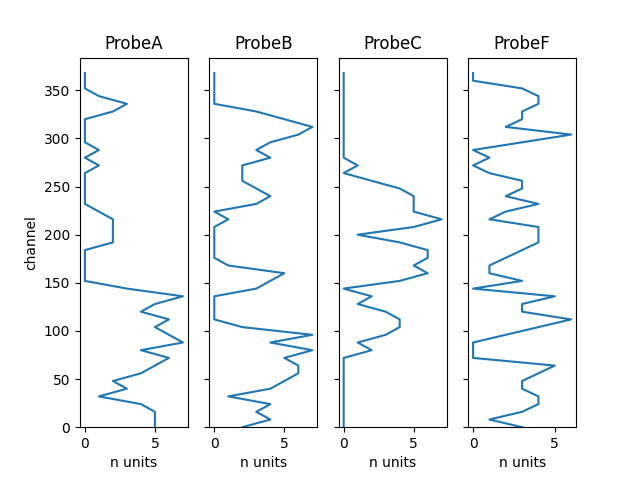

In [12]:
probes = session.good_units['probe'].unique()
ch_bins=np.arange(0,384,8)

units_by_channel = session.good_units[['probe','peak_channel']].value_counts()

fig,ax=plt.subplots(1,len(probes))

for ip,pr in enumerate(probes):
    unit_hist,edges=np.histogram(units_by_channel[pr].sort_index().index,bins=ch_bins)
    ax[ip].plot(unit_hist,ch_bins[:-1])
    ax[ip].set_ylim([0,384])
    ax[ip].set_xlabel('n units')
    ax[ip].set_title('Probe'+pr)
    if ip>0:
        ax[ip].set_yticklabels([])
    else:
        ax[ip].set_ylabel('channel')
        

### Plot rasters 

<IPython.core.display.Javascript object>


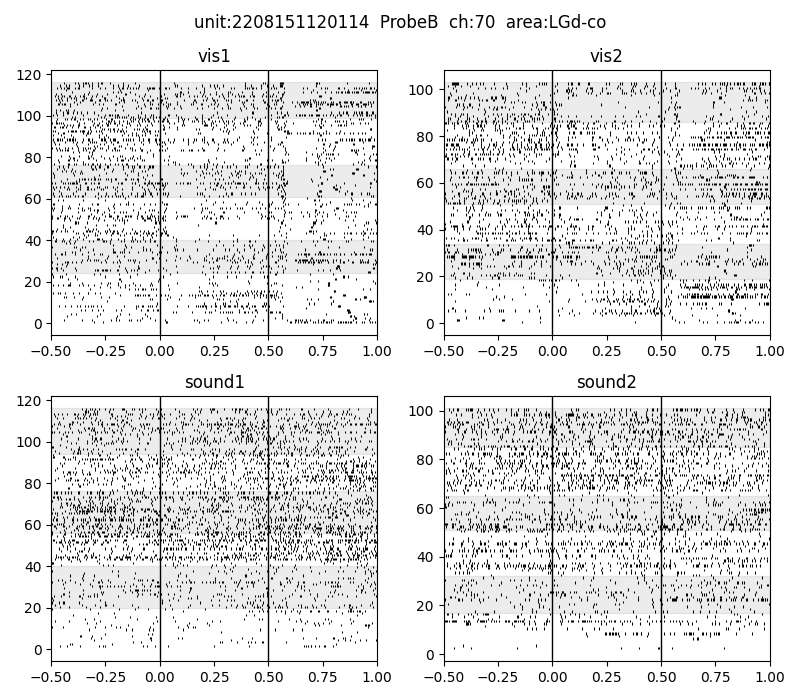

In [13]:
#Plot rasters: sort by stimulus duration

#select unit either by its location in the unit table or its ID    
unit_id=session.good_units.index[205]
# unit_id=10121

fig,ax=plt.subplots(2,2,figsize=(8,7))
ax=ax.flatten()
stim_types=['vis1','vis2','sound1','sound2']

color_options = ['green','blue','red','orange']

trial_color_map = {}
for ii,ss in enumerate(stim_types):
    trial_color_map[ss]=color_options[ii]


for si,ss in enumerate(stim_types):
    stim_trials = session.trials[session.trials['trialStimID']==ss]
    sel_trials = session.trial_da.sel(trials=stim_trials.index.values)
    
    #find the ilocs of block transitions
    sel_trials_table = session.trials.loc[stim_trials.index.values]
    column_changes = sel_trials_table['trialstimRewarded'].shift() != sel_trials_table['trialstimRewarded']
    block_changes = sel_trials_table[column_changes]
    
    for it,tt in enumerate(sel_trials.trials.values):
        trial_spikes = sel_trials.sel(unit_id=unit_id,trials=tt)
        trial_color=[]

        trial_color = trial_color_map[session.trials['trialStimID'][tt]]

        trial_spike_times = trial_spikes.time[trial_spikes.values.astype('bool')]
        ax[si].vlines(trial_spike_times,ymin=it,ymax=it+1,linewidth=0.75,color='k')

    if len(block_changes)>1:
        if block_changes.iloc[0]['trialstimRewarded']=='vis1':
            start_block=1
        elif block_changes.iloc[0]['trialstimRewarded']=='sound1':
            start_block=0

        for xx in np.asarray([0,2,4])+start_block:
            start_iloc=sel_trials_table.index.get_loc(block_changes.index[xx])
            if (xx+1)>(len(block_changes)-1):
                end_iloc=len(sel_trials_table)
            else:
                end_iloc=sel_trials_table.index.get_loc(block_changes.index[xx+1])
            temp_patch=patches.Rectangle([-0.5,start_iloc],1.5,end_iloc-start_iloc,
                                        color=[0.5,0.5,0.5],alpha=0.15)
            ax[si].add_patch(temp_patch)
        
    ax[si].set_xlim([-0.5,1.0])

    ax[si].axvline(0,color='k',linewidth=1)
    ax[si].axvline(0.5,color='k',linewidth=1)

    ax[si].set_title(ss)

    
fig.suptitle('unit:'+str(unit_id)+'  Probe'+session.good_units['probe'].loc[unit_id]+
             '  ch:'+str(session.good_units['peak_channel'].loc[unit_id])+'  area:'+
             session.good_units['area'].loc[unit_id])

fig.tight_layout()



### Plot heatmaps - averaged across all trials

In [14]:
#Find/define probe borders for plotting

sel_borders='area'

if sel_borders=='probe':
    borders=np.where(session.good_units['probe'].iloc[:-1].values!=session.good_units['probe'].iloc[1:].values)[0]
    all_edges=np.hstack([0,borders,len(session.good_units)])
    border_midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
    border_labels=session.good_units['probe'].iloc[border_midpoints.astype('int')].values
elif sel_borders=='area':
    borders=np.where(session.good_units['area'].iloc[:-1].values!=session.good_units['area'].iloc[1:].values)[0]
    all_edges=np.hstack([0,borders,len(session.good_units)])
    border_midpoints=all_edges[:-1]+(all_edges[1:]-all_edges[:-1])/2
    border_labels=session.good_units['area'].iloc[border_midpoints.astype('int')].values

In [15]:
#Average & normalize responses of each unit to each stimulus
gwindow = sg.gaussian(15, std=5)

#find baseline mean and std per unit
baseline_mean_per_trial=session.trial_da.sel(time=slice(-0.5,-0.4)).mean(dim=["time"])
baseline_mean=baseline_mean_per_trial.mean(dim="trials").values
baseline_std=baseline_mean_per_trial.std(dim="trials").values

#find unique stimuli
stimuli = np.unique(session.trials['trialStimID'])

#remove catch trials for this plot
stimuli = stimuli[stimuli!='catch']

#pre-allocate array for average
unit_frs_by_stim = np.zeros((len(session.trial_da.unit_id),len(session.trial_da.time),len(stimuli)))

#normalize each unit's avg FRs to its baseline  FR
for ss,stim in enumerate(stimuli):
    stim_trials = (session.trials.query('trialStimID==@stim')).index.values
    unit_frs_by_stim[:,:,ss] = session.trial_da.sel(trials=stim_trials).mean(dim="trials").values
    
    # z-score each unit rel to its baseline
    unit_frs_by_stim[:,:,ss] = ((unit_frs_by_stim[:,:,ss].T- baseline_mean.T)/baseline_std.T).T
    
    for iu in range(0,len(session.trial_da.unit_id)):
        unit_frs_by_stim[iu,:,ss]=sg.convolve(unit_frs_by_stim[iu,:,ss],
                                                gwindow,mode='same')/np.sum(gwindow)

<IPython.core.display.Javascript object>


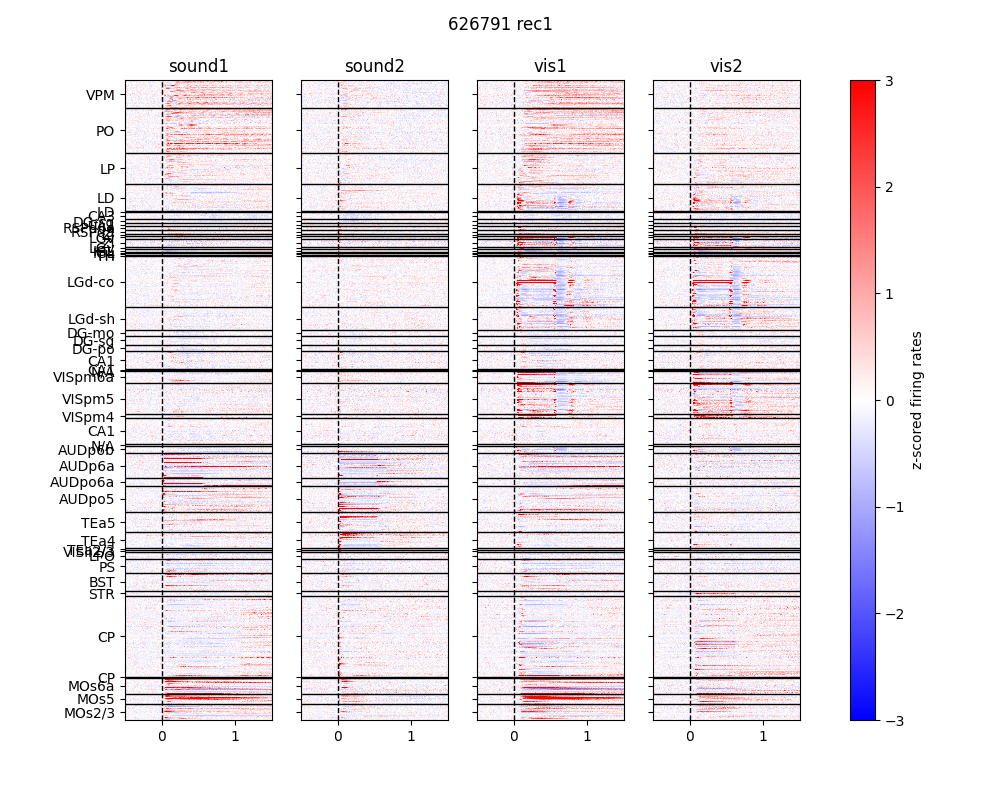

Text(0, 0.5, 'z-scored firing rates')

In [16]:
# plot heatmaps
# ordered by ascending channel number - top is tip of probe

fig,ax=plt.subplots(1,4,figsize=(10,8))
for xx in range(0,len(stimuli)): 
    im = ax[xx].imshow(unit_frs_by_stim[:,:,xx],aspect='auto',vmin=-3,vmax=3,
                   cmap=plt.get_cmap('bwr'),interpolation='none',
                   extent=(-time_before_flash,trial_duration-time_before_flash,
                           0,unit_frs_by_stim.shape[0]))
    
    ax[xx].axvline(0,color='k',linestyle='--',linewidth=1)
    ax[xx].set_title(stimuli[xx])
    ax[xx].set_xlim(-0.5,1.5)
    ax[xx].hlines(unit_frs_by_stim.shape[0]-borders,xmin=-0.5,xmax=1.5,
                   color='k',linewidth=1)
    ax[xx].set_yticks(unit_frs_by_stim.shape[0]-border_midpoints)
    ax[xx].set_yticklabels(border_labels)
    if xx>0:
        ax[xx].set_yticklabels([])
        
fig.suptitle(session.metadata['mouseID']+' rec'+str(session.metadata['ephys_session_num']))

# this adjusts the other plots to make space for the colorbar
fig.subplots_adjust(bottom=0.1, right=0.8, top=0.9, hspace=0.3) 
cax = plt.axes([0.85, 0.1, 0.025, 0.8])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('z-scored firing rates')


### Plot PSTH according to probe and channel range

In [17]:
# choose channel range and probe

sel_units_by='area'

#select units to plot by area
area_sel='VIS'
#or by channel/probe
channel_range=[120,350]
sel_probe='F'


if sel_units_by=='area':
    sel_units = session.good_units.query('area.str.contains(@area_sel)')
    fig_title=('area '+area_sel+' (n='+str(len(sel_units))+')')
    
elif sel_units_by=='channels':
    sel_units = session.good_units.query('probe == @sel_probe and \
                                           peak_channel >= @channel_range[0] and \
                                           peak_channel < @channel_range[1]')
    fig_title=('probe'+sel_probe+' ch'+str(channel_range[0])+'-'+
               str(channel_range[1])+' (n='+str(len(sel_units))+')')
    
# average PSTH across selected units & each stimulus
stimuli = np.unique(session.trials['trialStimID'])
stim_PSTHs = {}

for stim in stimuli:
    stim_trials = session.trials.query('trialStimID == @stim').index
    stim_PSTHs[stim]=[]
    stim_PSTHs[stim].append(session.trial_da.sel(
                            unit_id=sel_units.index,
                            trials=stim_trials).mean(dim=['trials']))

# smooth each unit's PSTH
gwindow = sg.gaussian(25, std=10)
stim_PSTH_smooth={}
for stim in stimuli:
    stim_PSTH_smooth[stim]=np.zeros(stim_PSTHs[stim][0].shape)

    for iu,uu in enumerate(stim_PSTHs[stim][0].unit_id.values):
        stim_PSTH_smooth[stim][iu,:]=sg.convolve(stim_PSTHs[stim][0].sel(unit_id=uu),
                                                 gwindow,mode='same')/np.sum(gwindow)

<IPython.core.display.Javascript object>


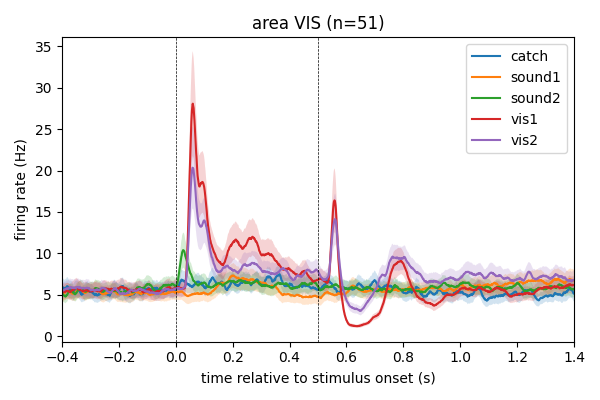

In [20]:
fig,ax=plt.subplots(1,1,figsize=(6,4))

for stim in stimuli:

    y=np.nanmean(stim_PSTH_smooth[stim],0)
    err=np.nanstd(stim_PSTH_smooth[stim],0)/np.sqrt(stim_PSTH_smooth[stim].shape[0])
    linex=ax.plot(stim_PSTHs[stim][0].time, y)
    plt.fill_between(stim_PSTHs[stim][0].time, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor=linex[0].get_color())


ax.set_title(fig_title)

ax.set_xlabel('time relative to stimulus onset (s)')
ax.set_ylabel('firing rate (Hz)')
ax.set_xlim([-0.4,1.4])

ax.legend(stimuli)

stim_lines=[0,0.5]
for sl in stim_lines:
    ax.axvline(sl,color='k',linestyle='--',linewidth=0.5)

fig.tight_layout()